In [13]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_74833/1271132919.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models["formula_result"] = (df_models["dfQuantity"] - df_models["actualQuantity"]).abs() / df_models["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_74833/1271132919.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_models_result = df_models.groupby([
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_74833/1271132919.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy

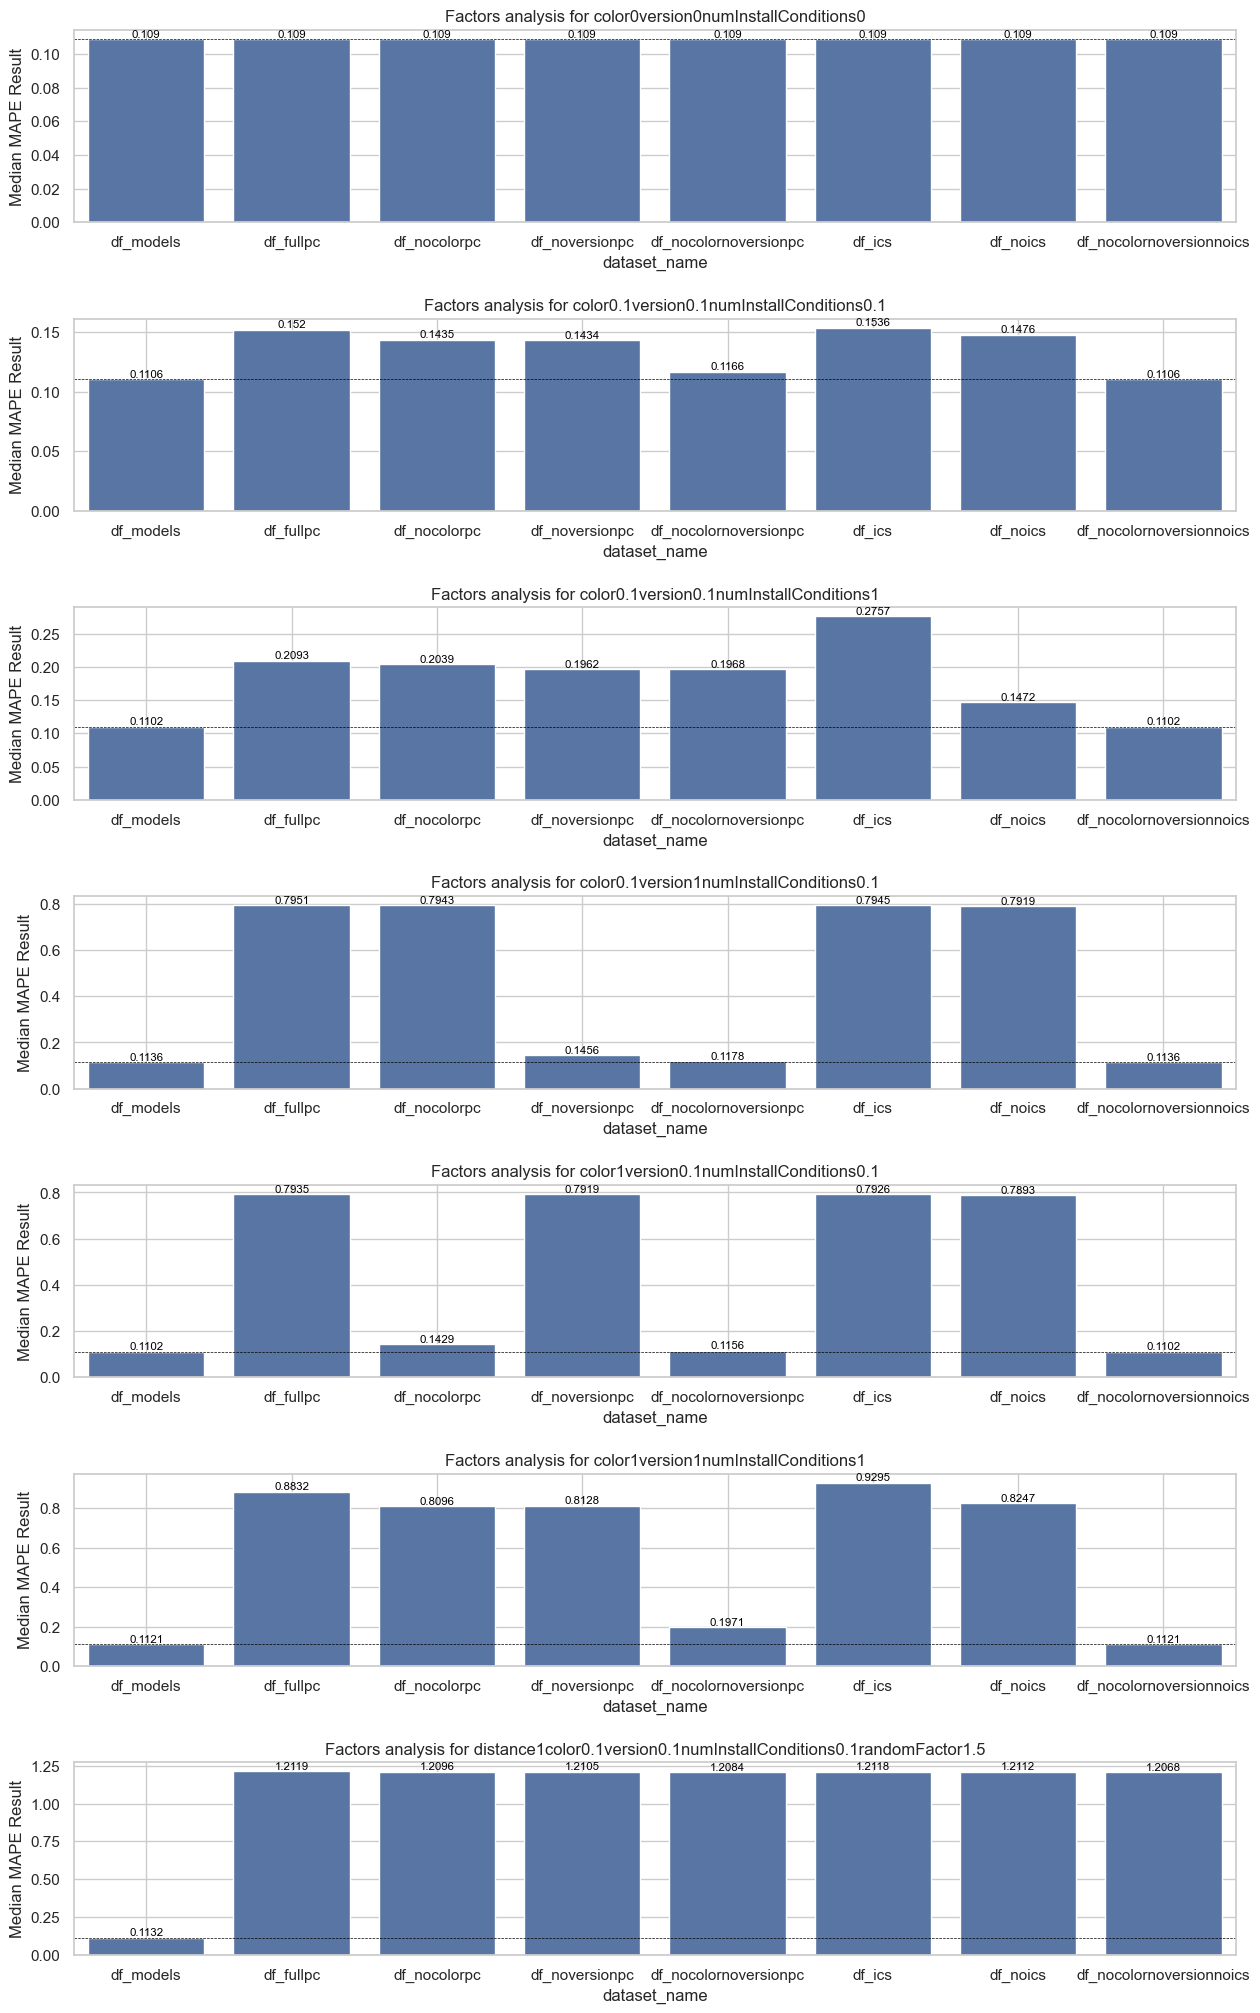

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [15]:
findspark.init()

analysis = [
    "color0version0numInstallConditions0",
    "color0.1version0.1numInstallConditions0.1",
    "color0.1version0.1numInstallConditions1",
    "color0.1version1numInstallConditions0.1",
    "color1version0.1numInstallConditions0.1",
    "color1version1numInstallConditions1",
    "distance1color0.1version0.1numInstallConditions0.1randomFactor1.5"
]

seaborn.set_theme(style="whitegrid")
fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7)) = plt.subplots(7, 1, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5)
subplots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
subplotidx = 0

for dataset in analysis:
    df = pd.read_parquet(f'../../../generate data/5.3/all combined/{dataset}/')
    df_models = df[df["partCodeId"].str.contains("model")]

    df_models["formula_result"] = (df_models["dfQuantity"] - df_models["actualQuantity"]).abs() / df_models["actualQuantity"]
    # Group by the correct columns
    df_models_result = df_models.groupby([
        "partCodeId",
        "vehicleModelId",
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_models_result = df_models_result[df_models_result["number"] > 0 ]

    # Filter the DataFrame to include only rows where partCodeId doesn't contain "model"
    df_fullpc = df[~df["partCodeId"].str.contains("model")]

    df_fullpc["formula_result"] = (df_fullpc["dfQuantity"] - df_fullpc["actualQuantity"]).abs() / df_fullpc["actualQuantity"]
    # Group by the correct columns
    df_fullpc_result = df_fullpc.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_fullpc_result = df_fullpc_result[df_fullpc_result["number"] > 0 ]
    
    df_nocolorpc = df[~df["partCodeId"].str.contains("model")]
    # Filter the DataFrame to include only rows where partCodeId doesn't contain "model" nor a color
    df_nocolorpc = df_nocolorpc[df_nocolorpc["partCodeId"].str.len() <= 11]
    df_nocolorpc["formula_result"] = (df_nocolorpc["dfQuantity"] - df_nocolorpc["actualQuantity"]).abs() / df_nocolorpc["actualQuantity"]
    # Group by the correct columns
    df_nocolorpc_result = df_nocolorpc.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_nocolorpc_result = df_nocolorpc_result[df_nocolorpc_result["number"] > 0 ]

    df_noindexpc = df[~df["partCodeId"].str.contains("model")]
    # Filter the DataFrame to include only rows where partCodeId characther 11th is 0 
    df_noindexpc = df_noindexpc[df_noindexpc["partCodeId"].str[10] == "0"]
    df_noindexpc["formula_result"] = (df_noindexpc["dfQuantity"] - df_noindexpc["actualQuantity"]).abs() / df_noindexpc["actualQuantity"]
    # Group by the correct columns
    df_noindexpc_result = df_noindexpc.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_noindexpc_result = df_noindexpc_result[df_noindexpc_result["number"] > 0 ]

    df_nocolornoindexpc = df[~df["partCodeId"].str.contains("model")]
    # Filter the DataFrame to include only rows where partCodeId doesn't contain "model" nor a color and the 11th character is 0
    df_nocolornoindexpc = df_nocolornoindexpc[df_nocolornoindexpc["partCodeId"].str.len() <= 11]
    df_nocolornoindexpc = df_nocolornoindexpc[df_nocolornoindexpc["partCodeId"].str[10] == "0"]
    df_nocolornoindexpc["formula_result"] = (df_nocolornoindexpc["dfQuantity"] - df_nocolornoindexpc["actualQuantity"]).abs() / df_nocolornoindexpc["actualQuantity"]
    # Group by the correct columns
    df_nocolornoindexpc_result = df_nocolornoindexpc.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_nocolornoindexpc_result = df_nocolornoindexpc_result[df_nocolornoindexpc_result["number"] > 0 ]

    df_ics = df[~df["partCodeId"].str.contains("model")]
    df_ics = df_ics[df_ics["numberOfInstallationConditions"] > "0"]
    df_ics["formula_result"] = (df_ics["dfQuantity"] - df_ics["actualQuantity"]).abs() / df_ics["actualQuantity"]
    # Group by the correct columns
    df_ics = df_ics.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_ics = df_ics[df_ics["number"] > 0 ]

    df_noics = df[~df["partCodeId"].str.contains("model")]
    df_noics = df_noics[df_noics["numberOfInstallationConditions"] == "0"]
    df_noics["formula_result"] = (df_noics["dfQuantity"] - df_noics["actualQuantity"]).abs() / df_noics["actualQuantity"]
    # Group by the correct columns
    df_noics_result = df_noics.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_noics_result = df_noics_result[df_noics_result["number"] > 0 ]

    df_nocolornoindexnoics = df[~df["partCodeId"].str.contains("model")]
    df_nocolornoindexnoics = df_nocolornoindexnoics[df_nocolornoindexnoics["partCodeId"].str.len() <= 11]
    df_nocolornoindexnoics = df_nocolornoindexnoics[df_nocolornoindexnoics["partCodeId"].str[10] == "0"]
    df_nocolornoindexnoics = df_nocolornoindexnoics[df_nocolornoindexnoics["numberOfInstallationConditions"] == "0"]
    df_nocolornoindexnoics["formula_result"] = (df_nocolornoindexnoics["dfQuantity"] - df_nocolornoindexnoics["actualQuantity"]).abs() / df_nocolornoindexnoics["actualQuantity"]
    # Group by the correct columns
    df_nocolornoindexnoics_result = df_nocolornoindexnoics.groupby([
        "partCodeId",
        "vehicleModelId"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_nocolornoindexnoics_result = df_nocolornoindexnoics_result[df_nocolornoindexnoics_result["number"] > 0 ]


    df_list = [df_models_result, df_fullpc_result, df_nocolorpc_result, df_noindexpc_result, df_nocolornoindexpc_result, df_ics, df_noics_result, df_nocolornoindexnoics_result]
    df_names = ["df_models", "df_fullpc", "df_nocolorpc", "df_noversionpc", "df_nocolornoversionpc", "df_ics","df_noics", "df_nocolornoversionnoics"]
    df_statistics = pd.DataFrame(columns=["dataset_name", "median"])
    for i, df in enumerate(df_list):
        median = df["final_result"].quantile(0.5)
        df_statistics.loc[i] = [df_names[i], median]
    df_statistics = df_statistics.set_index("dataset_name")
    df_statistics = df_statistics.reset_index()
    df_statistics = df_statistics.melt(id_vars=["dataset_name"], var_name="statistic", value_name="value")
    plt.figure(figsize=(10, 6))
    graph = seaborn.barplot(ax=subplots[subplotidx], x="dataset_name", y="value", data=df_statistics)
    graph.axhline(df_models_result["final_result"].quantile(0.5), color='black', linewidth=0.5, linestyle='--')
    # add value above bars
    for index, row in df_statistics.iterrows():
        subplots[subplotidx].text(row["dataset_name"], row["value"], round(row["value"], 4), color='black', ha="center", va="bottom", fontsize="x-small", fontweight="normal")

    subplots[subplotidx].set_title(f"Factors analysis for {dataset}")
    subplots[subplotidx].set(ylabel="Median MAPE Result")
    subplots[subplotidx].grid(True)
    subplotidx += 1